In [1]:
#import hangul_font
import warnings
import urllib.request as req
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import nltk
# 한글폰트 사용
plt.rcParams['font.family'] = 'Malgun Gothic' 
mpl.rc('axes', unicode_minus=False)

In [3]:
data1=pd.read_excel("data/se/2015_blog.xlsx")
data2=pd.read_excel("data/se/preprocessing_2015_cafe_ssal.xlsx")

In [4]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7740 non-null   int64 
 1   title       7733 non-null   object
 2   date        7739 non-null   object
 3   chat        4977 non-null   object
 4   content     7243 non-null   object
 5   id          7422 non-null   object
dtypes: int64(1), object(5)
memory usage: 362.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9653 entries, 0 to 9652
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9653 non-null   int64 
 1   title       9653 non-null   object
 2   nickname    9653 non-null   object
 3   date        9653 non-null   object
 4   content     9607 non-null   object
 5   comments    8912 non-null   object
dtypes: int64(1), object(5)
memory usage: 452.6+ KB


In [5]:
d3=pd.concat([data1,data2])
d3=d3[["date","content"]]
d3

,date,content
0,2015.01.01.,한인마트는 귀찮아서 안가므로 떡볶이를 먹고싶을 때를 대비하여\n이전에 마트에서 쌀가...
1,2015.01.01.,2015. 1. 1(을미년 새해가...)\n갑자기 만들어 보고싶은게 생각 났어요!\...
2,2015.01.01.,2014년 마지막 치킨 치킨은 쌀통닭 너로 정했따!!!!!!!\n\n \n\n\n\...
3,2015.01.01.,이번 포스팅에서는 쌀벌레 없애는 방법에 대해서 알아보겠습니다\n\n\n쌀 속에 벌레...
4,2015.01.01.,"조청은 따끈하게 차로 마셔도 좋고,\n물엿 대신 요리에 넣어도 좋고,\n가래떡이나 ..."
...,...,...
9648,2015.12.16,요리전용맛술 마트가면 보기는 했는데 저게 꼭 필요할까 하는 생각에 구매를 망설였는데...
9649,2015.12.30,가능한가요;;;;;믹서기 청소가 귀찮아서 ;;;
9650,2015.12.25,담주부터 초기이유식 시작인데 아직 애가 못앉잖아요. 다들 그냥 분유주듯 안아서 먹이...
9651,2015.12.23,어뭉들어디서 사드시나요? 아이간식사먹이는 사이트추천좀해주셔요^ ^


In [6]:
data=d3.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    16850 non-null  int64 
 1   date     16850 non-null  object
 2   content  16850 non-null  object
dtypes: int64(1), object(2)
memory usage: 395.0+ KB


In [7]:
result_double_list=[]
for i in data.index:
    content=str(data.loc[i,"content"])
    if len(content)>10:
        
        result=[i,content]
        result_double_list.append(result)
    else:
        print(content)
    

0
0
 
 꿀팁 
   
진심 욕나옴ㅋㅋ
전화 안돼요 
     
일산1동 입니다^^
 
냉무 
있을까요? 
ㄹㅇ개좋음
   투척! 
 
전 7.5억
뭐가더나음?
~~~ 
ㅠㅠ
간해도되나여?
율하쪽말구요 
ㅈㄱㄴ
 고스톱  
제목그대로입니다
전 앉아서쌈
롤캎하노?  
 .. 
      
  
 먹던중한것 
쌀피자 
 
 
 
 
  오늘한거에요 
   
 ㅠㅠ 
쌀눈이 살아있다
필요한분 계실까요?
 ㅋ 
ㅋㅋ
 헉 ㄷㄷ 
저나번호아시는분 
펑이요 
ㅇㅇ
ㅈㄱㄴ
...레전설 
교환원해요. 
   
전설님의 조언이시다
   
히히 맛나요
옛날 돈의대한 배틀
        
난 쫄깃한 쌀떡!!
곧 쌀것같음. 
팔렷어용~    
   
    
 
.
 3만마리 가능? 
잘부탁 드려요
도와주세요 ㅜㅜ
챗주셔용~~~ 
같은건가요??
   
      
 ㅇㅈ? 
해드시는곳있나요??
  
 
ㅇㅈ!?
ㅋㅋㅋㅋㅋ 
 
득수 왜이러나욤 
비올레 상향!!@
배달 지리네
??????
아시는분~~♡ 
 캬 
  
      
   
  
 
으잇짜
연락주세요^*^ 
ㅠㅜ
   
프리즈 
 ㅡ 
비법좀~~
 
소주에삽겹살 
빼애애애애애액  
addsadsad
판매완료
내용 무 
필요하신분 고~
조각인애들말고 
ㅎㅎ 
ㅉ
비율을 다시맞춰라!
천국으로 감 
 
 
  
    
제발좀 ㅠㅠ
쌀을달라~
난 쌀떡볶이 ㅇ.ㅇ
밀가루vs쌀 
한끼때웠네요~  
 아이덴-티티. 
알려주세요~~ 
텔미
ㅈㄱㄴ
와 진짜 꿀이득
 언제 ㅋ? 
ㅇㅇ
ㅡ 
       
승자는?
 무술워
.. 
 
후....
, 
 
  
달립시다!
? 
부영요  
텔미~ 
     
  쌀 배달 
넘 야해서  
ㅎㅎ
   
쌀
쌀을 ㅠㅡㅠ
언제임????
하엘명중장갑
혹시필요하신분!!!
사세요^^
신랑친구들과 야식~
-
  
냉무 
  
 찾아가셔용 
궁금해용^^ 
연락 주세요.
있나요 ~~? ^^
사우동입니다
휴지로닦는중
알려주세요~~^^
 산본에 살아요~ 
0
꼭 안아달라고 ㅎㅎ
      
3만원요~ 
  
 

In [8]:
data=data.reset_index()

In [9]:
result_df=pd.DataFrame(result_double_list,columns=["index","text"])
print(result_df.shape)
result_df

(16617, 2)


,index,text
0,0,한인마트는 귀찮아서 안가므로 떡볶이를 먹고싶을 때를 대비하여\n이전에 마트에서 쌀가...
1,1,2015. 1. 1(을미년 새해가...)\n갑자기 만들어 보고싶은게 생각 났어요!\...
2,2,2014년 마지막 치킨 치킨은 쌀통닭 너로 정했따!!!!!!!\n\n \n\n\n\...
3,3,이번 포스팅에서는 쌀벌레 없애는 방법에 대해서 알아보겠습니다\n\n\n쌀 속에 벌레...
4,4,"조청은 따끈하게 차로 마셔도 좋고,\n물엿 대신 요리에 넣어도 좋고,\n가래떡이나 ..."
...,...,...
16612,16845,요리전용맛술 마트가면 보기는 했는데 저게 꼭 필요할까 하는 생각에 구매를 망설였는데...
16613,16846,가능한가요;;;;;믹서기 청소가 귀찮아서 ;;;
16614,16847,담주부터 초기이유식 시작인데 아직 애가 못앉잖아요. 다들 그냥 분유주듯 안아서 먹이...
16615,16848,어뭉들어디서 사드시나요? 아이간식사먹이는 사이트추천좀해주셔요^ ^


In [10]:
result_df.drop_duplicates(inplace=True)
result_df.shape

(16617, 2)

In [11]:
from konlpy.tag import Okt
okt = Okt()

In [12]:
import re
def cleanText(readData):
    text=re.sub("[^(가-힣a-zA-Z0-9. )]", '',readData)
    return text

In [13]:
from tqdm import tqdm
mas_double_list=[]
for text in tqdm(result_df['text']):
    mas_loc=okt.nouns(cleanText(text))
    mas_double_list.append(mas_loc)

100%|██████████| 16617/16617 [06:02<00:00, 45.85it/s] 


In [14]:
result_df["mas"]=mas_double_list
result_df.head()

,index,text,mas
0,0,한인마트는 귀찮아서 안가므로 떡볶이를 먹고싶을 때를 대비하여\n이전에 마트에서 쌀가...,"[한인, 마트, 떡볶이, 때, 대비, 마트, 쌀, 가루, 오늘, 설날, 새해, 때,..."
1,1,2015. 1. 1(을미년 새해가...)\n갑자기 만들어 보고싶은게 생각 났어요!\...,"[을미년, 새해, 갑자기, 보고, 생각, 이름, 쌀, 만두국, 쌀, 가루, 반죽, ..."
2,2,2014년 마지막 치킨 치킨은 쌀통닭 너로 정했따!!!!!!!\n\n \n\n\n\...,"[마지막, 치킨, 치킨, 쌀, 통닭, 너, 정, 배달, 옴, 힝, 인터폰, 쌀, 통..."
3,3,이번 포스팅에서는 쌀벌레 없애는 방법에 대해서 알아보겠습니다\n\n\n쌀 속에 벌레...,"[이번, 포스팅, 쌀벌레, 방법, 대해, 쌀, 속, 벌레, 생기, 정말, 한숨, 마..."
4,4,"조청은 따끈하게 차로 마셔도 좋고,\n물엿 대신 요리에 넣어도 좋고,\n가래떡이나 ...","[조청, 차로, 물엿, 대신, 요리, 가래떡, 과자, 등, 그냥, 사용, 품목, 중..."


In [15]:
st = ['천원', '꼭걸', '먹이', '그날', '삭제', '키', '정말', '입', '만', '포스팅', '약간', '정보', 
'말', '어제', '옵션', '아래', '분', '처음', '개', '년', '혹시', '사람', '시', '추천', '쌀', '애', '저희', '로', '이용',
 '판매', '체', '가요', '사', '번호', '이제', '나', '을', '경우', '오늘', '아주', '진짜', '모두', '자동', '날', '시골', '는', '손', 
 '생각', '질문', '연락', '살', '역시', '센치', '구입', '끼', '용', '사실', '것', '배', '위', '요즘', '다른', '지금', '불', '시작', 
 '다시', '우리', '은', '사랑', '거', '킹', '제품', '등', '조금', '내', '이후', '앞', '줄', '단계', '이번', '직접', '이', '재생',
  '좀', '미니', '봉', '가', '맘', '월', '듯', '중', '저', '신분', '첫', '미리', '더', '사용', '여기', '농사', '요', '한번', '작성', 
  '게시', '주문', '어디', '농', '산', '개월', '거의', '안', '를', '완전', '제', '및', '실', '글', '원', '다음', '위해', '곳', '그냥',
   '구매', '초기', '준비', '도', '계속', '때', '유통', '살짝', '먹기', '후', '나눔', '때모두', '댓글', '알', '규정', '정도', '점', 
   '스푼', '얼마', '화질', '일', '못', '마을', '만원', '아시', '하루', '걸', '전', '바로', '수', '또', '중기', '번', '먼저', '달', 
   '기', '건', '반', '구', '숟가락', '사진', '선택', '사서', '호', '완성', '가지', '뭐', '가장', '내일', '공지', '때문', '방법', 
   '보고', '이상', '끝', '하나', '해', '사항', '한국', '그', '습', '꼭', '왜', '떡뻥',
   "보시","함","총","몇","뭘","등등","장","옆","담","길","보","주","초","볼","게","해도",'보통',"데","식",'초',"똑","포","로만","해먹","온","하니","늘","틀","속","명","뒤",
"단", "여", "지은","바","막",'쪽',"뭘","총","약","낼"]

In [16]:
q = " "
for i in range(len(data)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns = okt.nouns(q)
nouns2=nouns
nouns3=nouns
nouns2_copy=nouns.copy()

In [17]:
r=[]

for i in nouns2_copy :
    if i =="아가":
        t=i.replace("아가","아이")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r



r=[]

for i in nouns2_copy :
    if i =="아기":
        t=i.replace("아기","아이")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r


r=[]

for i in nouns2_copy :
    if i =="애기":
        t=i.replace("애기","아이")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r


r=[]

for i in nouns2_copy :
    if i =="베이":
        t=i.replace("베이","베이킹")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r

r=[]
for i in nouns2_copy :
    if i =="쌀벌레":
        t=i.replace("쌀벌레","벌레")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r

r=[]
for i in nouns2_copy :
    if i =="벌래":
        t=i.replace("벌래","벌레")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r

r=[]
for i in nouns2_copy :
    if i =="쌀벌래":
        t=i.replace("쌀벌래","벌레")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r

r=[]
for i in nouns2_copy :
    if i =="바구미":
        t=i.replace("바구미","벌레")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r


r=[]
for i in nouns2_copy :
    if i =="기한":
        t=i.replace("기한","유통기한")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r


r=[]
for i in nouns2_copy :
    if i =="배송":
        t=i.replace("배송","배달")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r


r=[]
for i in nouns2_copy :
    if i =="택배":
        t=i.replace("택배","배달")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r



r=[]
for i in nouns2_copy :
    if i =="박력":
        t=i.replace("박력","박력분")
        r.append(t)
    else:
       r.append(i) 
nouns2_copy=r



In [38]:
count = Counter(nouns2_copy)

count

# remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter(
    {x: count[x] for x in count if x not in st})

print(remove_char_counter)

Counter({'맛': 11026, '가루': 10811, '이유식': 10811, '아이': 8605, '밥': 8159, '과자': 7553, '물': 7513, '미음': 6413, '집': 4861, '현미': 3828, '치킨': 3824, '떡': 3732, '통닭': 3453, '떡볶이': 3325, '엄마': 3204, '재료': 2921, '시간': 2638, '유기농': 2637, '배달': 2582, '보관': 2524, '빵': 2495, '포장': 2199, '소스': 2181, '만들기': 2158, '가격': 2140, '밀가루': 2113, '소고기': 1957, '백미': 1907, '간식': 1857, '양': 1814, '찹쌀': 1810, '느낌': 1803, '면': 1773, '치즈': 1688, '튀김': 1672, '반죽': 1667, '양념': 1644, '설탕': 1612, '음식': 1608, '피자': 1565, '감자': 1510, '요리': 1497, '도정': 1486, '벌레': 1433, '메뉴': 1391, '아침': 1359, '야채': 1353, '마음': 1334, '건강': 1320, '친구': 1278, '강정': 1271, '저녁': 1213, '무': 1207, '쿠키': 1199, '냄비': 1199, '고구마': 1176, '선물': 1152, '바삭': 1148, '향': 1144, '봉지': 1131, '마트': 1127, '그릇': 1097, '죽': 1087, '눈': 1085, '파스타': 1085, '잡곡': 1073, '우유': 1061, '이웃': 1057, '일단': 1047, '식빵': 1047, '양파': 1026, '모양': 1017, '냉동': 1016, '단호박': 1013, '후라이드': 1006, '일반': 1004, '소금': 1003, '발효': 1001, '몸': 981, '통': 976, '크림': 973, '종류': 968, '튀밥': 958, 

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
count = Counter(remove_char_counter).most_common()
count

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('맛', 11026),
 ('가루', 10811),
 ('이유식', 10811),
 ('아이', 8605),
 ('밥', 8159),
 ('과자', 7553),
 ('물', 7513),
 ('미음', 6413),
 ('집', 4861),
 ('현미', 3828),
 ('치킨', 3824),
 ('떡', 3732),
 ('통닭', 3453),
 ('떡볶이', 3325),
 ('엄마', 3204),
 ('재료', 2921),
 ('시간', 2638),
 ('유기농', 2637),
 ('배달', 2582),
 ('보관', 2524),
 ('빵', 2495),
 ('포장', 2199),
 ('소스', 2181),
 ('만들기', 2158),
 ('가격', 2140),
 ('밀가루', 2113),
 ('소고기', 1957),
 ('백미', 1907),
 ('간식', 1857),
 ('양', 1814),
 ('찹쌀', 1810),
 ('느낌', 1803),
 ('면', 1773),
 ('치즈', 1688),
 ('튀김', 1672),
 ('반죽', 1667),
 ('양념', 1644),
 ('설탕', 1612),
 ('음식', 1608),
 ('피자', 1565),
 ('감자', 1510),
 ('요리', 1497),
 ('도정', 1486),
 ('벌레', 1433),
 ('메뉴', 1391),
 ('아침', 1359),
 ('야채', 1353),
 ('마음', 1334),
 ('건강', 1320),
 ('친구', 1278),
 ('강정', 1271),
 ('저녁', 1213),
 ('무', 1207),
 ('쿠키', 1199),
 ('냄비', 1199),
 ('고구마', 1176),
 ('선물', 1152),
 ('바삭', 1148),
 ('향', 1144),
 ('봉지', 1131),
 ('마트', 1127),
 ('그릇', 1097),
 ('죽', 1087),
 ('눈', 1085),
 ('파스타', 1085),
 ('잡곡', 1073),
 ('우유', 106

In [40]:
mas_counts=Counter(remove_char_counter)
data_barh=pd.DataFrame(mas_counts.most_common(50),
columns=["word","counts"])
data_barh.head()

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,word,counts
0,맛,11026
1,가루,10811
2,이유식,10811
3,아이,8605
4,밥,8159


In [41]:
min_count=100
word_list=[]
for word,count in count:
    if count>min_count:
        word_list.append(word)
        

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
print(len(word_list))
word_list

1677


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['맛',
 '가루',
 '이유식',
 '아이',
 '밥',
 '과자',
 '물',
 '미음',
 '집',
 '현미',
 '치킨',
 '떡',
 '통닭',
 '떡볶이',
 '엄마',
 '재료',
 '시간',
 '유기농',
 '배달',
 '보관',
 '빵',
 '포장',
 '소스',
 '만들기',
 '가격',
 '밀가루',
 '소고기',
 '백미',
 '간식',
 '양',
 '찹쌀',
 '느낌',
 '면',
 '치즈',
 '튀김',
 '반죽',
 '양념',
 '설탕',
 '음식',
 '피자',
 '감자',
 '요리',
 '도정',
 '벌레',
 '메뉴',
 '아침',
 '야채',
 '마음',
 '건강',
 '친구',
 '강정',
 '저녁',
 '무',
 '쿠키',
 '냄비',
 '고구마',
 '선물',
 '바삭',
 '향',
 '봉지',
 '마트',
 '그릇',
 '죽',
 '눈',
 '파스타',
 '잡곡',
 '우유',
 '이웃',
 '일단',
 '식빵',
 '양파',
 '모양',
 '냉동',
 '단호박',
 '후라이드',
 '일반',
 '소금',
 '발효',
 '몸',
 '통',
 '크림',
 '종류',
 '튀밥',
 '걱정',
 '부분',
 '맛집',
 '닭',
 '고민',
 '기분',
 '식감',
 '냄새',
 '콩',
 '신랑',
 '차',
 '아들',
 '밥맛',
 '소개',
 '술',
 '이건',
 '벼',
 '글루텐',
 '믹서기',
 '후기',
 '모습',
 '컵',
 '레시피',
 '베이킹',
 '비',
 '영양',
 '육수',
 '의',
 '뭔가',
 '원래',
 '입맛',
 '버터',
 '주말',
 '꼬치',
 '상태',
 '제일',
 '고기',
 '계란',
 '자주',
 '매콤',
 '냉장고',
 '지역',
 '이유',
 '그대로',
 '분유',
 '대신',
 '더욱',
 '동안',
 '라이스',
 '가족',
 '오븐',
 '아빠',
 '법',
 '조리',
 '기름',
 '크기',
 '울',
 '중간',
 '케이크',
 '조청',
 '난'

In [43]:
CHANGE_WORDS_SET=[['아가', '아이'],
 ['아기', '아이'],
 ['애기', '아이'],
 ['베이', '베이킹'],
 ['쌀벌레', '벌레'],
 ['벌래', '벌레'],
 ['쌀벌래', '벌레'],
 ['바구미', '벌레'],
 ['기한', '유통기한'],
 ['배송', '배달'],
 ['택배', '배달'],
 ['박력', '박력분']]

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
result_df

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,text,mas
0,0,한인마트는 귀찮아서 안가므로 떡볶이를 먹고싶을 때를 대비하여\n이전에 마트에서 쌀가...,"[한인, 마트, 떡볶이, 때, 대비, 마트, 쌀, 가루, 오늘, 설날, 새해, 때,..."
1,1,2015. 1. 1(을미년 새해가...)\n갑자기 만들어 보고싶은게 생각 났어요!\...,"[을미년, 새해, 갑자기, 보고, 생각, 이름, 쌀, 만두국, 쌀, 가루, 반죽, ..."
2,2,2014년 마지막 치킨 치킨은 쌀통닭 너로 정했따!!!!!!!\n\n \n\n\n\...,"[마지막, 치킨, 치킨, 쌀, 통닭, 너, 정, 배달, 옴, 힝, 인터폰, 쌀, 통..."
3,3,이번 포스팅에서는 쌀벌레 없애는 방법에 대해서 알아보겠습니다\n\n\n쌀 속에 벌레...,"[이번, 포스팅, 쌀벌레, 방법, 대해, 쌀, 속, 벌레, 생기, 정말, 한숨, 마..."
4,4,"조청은 따끈하게 차로 마셔도 좋고,\n물엿 대신 요리에 넣어도 좋고,\n가래떡이나 ...","[조청, 차로, 물엿, 대신, 요리, 가래떡, 과자, 등, 그냥, 사용, 품목, 중..."
...,...,...,...
16612,16845,요리전용맛술 마트가면 보기는 했는데 저게 꼭 필요할까 하는 생각에 구매를 망설였는데...,"[요리, 전용, 맛술, 마트, 가면, 보기, 저, 꼭, 생각, 구매, 밥차, 이벤트..."
16613,16846,가능한가요;;;;;믹서기 청소가 귀찮아서 ;;;,"[믹서기, 청소]"
16614,16847,담주부터 초기이유식 시작인데 아직 애가 못앉잖아요. 다들 그냥 분유주듯 안아서 먹이...,"[초기, 이유식, 시작, 애가, 그냥, 분유]"
16615,16848,어뭉들어디서 사드시나요? 아이간식사먹이는 사이트추천좀해주셔요^ ^,"[어뭉, 사드, 시나, 아이, 식사, 사이트, 추천, 좀]"


In [45]:
mas_double_list=[]
for mas_loc in result_df["mas"]:
    mas_sptd=mas_loc
    mas_list=[]
    for mas in mas_sptd:
        if mas not in st and mas in word_list:
            for cw in CHANGE_WORDS_SET:
                if cw[0]==mas:
                    mas==cw[1]
            mas_list.append(mas)
    mas_double_list.append(mas_list)


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
len(mas_double_list)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16617

In [47]:
from gensim import corpora
from gensim import models

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
dictionary=corpora.Dictionary(mas_double_list)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-08-26 20:38:31,798 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-08-26 20:38:32,235 : INFO : adding document #10000 to Dictionary(1674 unique tokens: ['가기', '가래떡', '가루', '결론', '고추']...)
2021-08-26 20:38:32,387 : INFO : built Dictionary(1674 unique tokens: ['가기', '가래떡', '가루', '결론', '고추']...) from 16617 documents (total 614499 corpus positions)
2021-08-26 20:38:32,388 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(1674 unique tokens: ['가기', '가래떡', '가루', '결론', '고추']...) from 16617 documents (total 614499 corpus positions)", 'datetime': '2021-08-26T20:38:32.388745', 'gensim': '4.0.1', 'pytho

In [49]:
corpus=[]
for mas_loc in mas_double_list:
    term_vect=dictionary.doc2bow(mas_loc)
    corpus.append(term_vect)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
import pyLDAvis.gensim_models
#import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 50;
    start = 2;
    step = 2;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.grid(True)
    plt.show()

    for m, cv in zip(x, coherence_values):
        print("Num Topics =", m, " has Coherence value of", round(cv, 4))


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
dictionary.filter_extremes(no_below=100)
corpus = [dictionary.doc2bow(text) for text in (mas_double_list)]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-08-26 20:38:38,025 : INFO : discarding 426 tokens: [('결론', 97), ('블랙', 53), ('빚', 86), ('찜', 85), ('참깨', 76), ('휴지', 90), ('카드', 92), ('쌀독', 91), ('이동', 89), ('찾기', 97)]...
2021-08-26 20:38:38,026 : INFO : keeping 1248 tokens which were in no less than 100 and no more than 8308 (=50.0%) documents
2021-08-26 20:38:38,028 : INFO : resulting dictionary: Dictionary(1248 unique tokens: ['가기', '가래떡', '가루', '고추', '과일']...)


Number of unique tokens: 1248
Number of documents: 16617


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-08-26 20:38:39,841 : INFO : using symmetric alpha at 0.5
2021-08-26 20:38:39,842 : INFO : using symmetric eta at 0.5
2021-08-26 20:38:39,843 : INFO : using serial LDA version on this node
2021-08-26 20:38:39,846 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 16617 documents, updating model once every 2000 documents, evaluating perplexity every 16617 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-26 20:38:39,848 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021

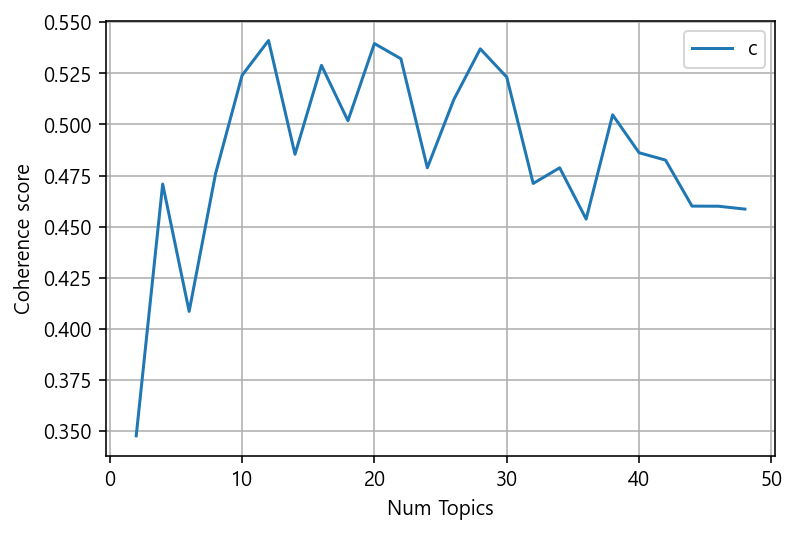

Num Topics = 2  has Coherence value of 0.3477
Num Topics = 4  has Coherence value of 0.4708
Num Topics = 6  has Coherence value of 0.4085
Num Topics = 8  has Coherence value of 0.476
Num Topics = 10  has Coherence value of 0.524
Num Topics = 12  has Coherence value of 0.541
Num Topics = 14  has Coherence value of 0.4854
Num Topics = 16  has Coherence value of 0.5289
Num Topics = 18  has Coherence value of 0.5018
Num Topics = 20  has Coherence value of 0.5395
Num Topics = 22  has Coherence value of 0.5321
Num Topics = 24  has Coherence value of 0.4788
Num Topics = 26  has Coherence value of 0.5121
Num Topics = 28  has Coherence value of 0.5369
Num Topics = 30  has Coherence value of 0.5231
Num Topics = 32  has Coherence value of 0.4711
Num Topics = 34  has Coherence value of 0.4788
Num Topics = 36  has Coherence value of 0.4537
Num Topics = 38  has Coherence value of 0.5047
Num Topics = 40  has Coherence value of 0.4861
Num Topics = 42  has Coherence value of 0.4825
Num Topics = 44  has

In [52]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


find_optimal_number_of_topics(dictionary, corpus, mas_double_list)

In [53]:
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis
# k = 12

# #  모델 생성
# lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics = k, id2word = dictionary , passes = 1, workers = 10)

# # 분석 결과 확인 
# print(lda_model.print_topics(num_topics = k, num_words = 15))



# prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
# pyLDAvis.save_html(prepared_data, 'LDA.html')
# pyLDAvis.display(prepared_data)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell') 
coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=12, passes=10, callbacks=[coherence_logger, perplexity_logger])

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

    # Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=mas_double_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)

    # Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=mas_double_list, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-08-26 20:45:46,042 : INFO : using symmetric alpha at 0.08333333333333333
2021-08-26 20:45:46,043 : INFO : using symmetric eta at 0.08333333333333333
2021-08-26 20:45:46,045 : INFO : using serial LDA version on this node
2021-08-26 20:45:46,050 : INFO : running online (multi-pass) LDA training, 12 topics, 10 passes over the supplied corpus of 16617 documents, updating model once every 2000 documents, evaluating perplexity every 16617 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-26 20:45:46,051 : INFO : PROGRESS: pass 0, at document #2000/16617
2021-08-26 20:45:47,179 : INFO : merging changes from

(0, '0.022*"건강" + 0.019*"라이스" + 0.017*"음식" + 0.017*"몸" + 0.016*"성분"')
(1, '0.023*"집" + 0.013*"아이" + 0.012*"시간" + 0.011*"엄마" + 0.011*"강정"')
(2, '0.162*"가루" + 0.041*"반죽" + 0.027*"설탕" + 0.021*"떡" + 0.021*"물"')
(3, '0.019*"지역" + 0.017*"회원" + 0.014*"이웃" + 0.013*"체험" + 0.013*"전달"')
(4, '0.085*"현미" + 0.026*"찹쌀" + 0.025*"도정" + 0.025*"백미" + 0.020*"국산"')
(5, '0.128*"밥" + 0.039*"보관" + 0.020*"맛" + 0.019*"벌레" + 0.018*"집"')
(6, '0.128*"이유식" + 0.073*"미음" + 0.069*"가루" + 0.038*"물" + 0.022*"소고기"')
(7, '0.038*"요리" + 0.032*"물" + 0.028*"재료" + 0.028*"맛" + 0.026*"죽"')
(8, '0.096*"떡" + 0.068*"떡볶이" + 0.037*"맛" + 0.030*"면" + 0.024*"가래떡"')
(9, '0.161*"과자" + 0.031*"맛" + 0.028*"간식" + 0.027*"유기농" + 0.027*"튀밥"')
(10, '0.090*"빵" + 0.058*"맛" + 0.038*"치즈" + 0.036*"식빵" + 0.031*"크림"')
(11, '0.064*"치킨" + 0.059*"통닭" + 0.046*"맛" + 0.027*"튀김" + 0.025*"배달"')


2021-08-26 20:47:26,077 : INFO : 11 accumulators retrieved from output queue
2021-08-26 20:47:26,174 : INFO : accumulated word occurrence stats for 65894 virtual documents



Coherence Score (c_v):  0.5960625261890483


2021-08-26 20:47:27,111 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2021-08-26 20:47:27,125 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2021-08-26 20:47:27,141 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2021-08-26 20:47:27,157 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2021-08-26 20:47:27,176 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2021-08-26 20:47:27,195 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2021-08-26 20:47:27,212 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2021-08-26 20:47:27,225 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2021-08-26 20:47:27,231 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2021-08-26 20:47:27,236 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2021-08-26 20:47:27,244 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2021-08-26 20:47:27


Coherence Score (u_mass):  -2.586806158290836


In [56]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'LDA_2015_12topic.html')
pyLDAvis.display(prepared_data)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
from gensim import corpora 
from gensim import models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
import urllib.request as req
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
warnings.filterwarnings(action='ignore')

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 2160x2160 with 0 Axes>

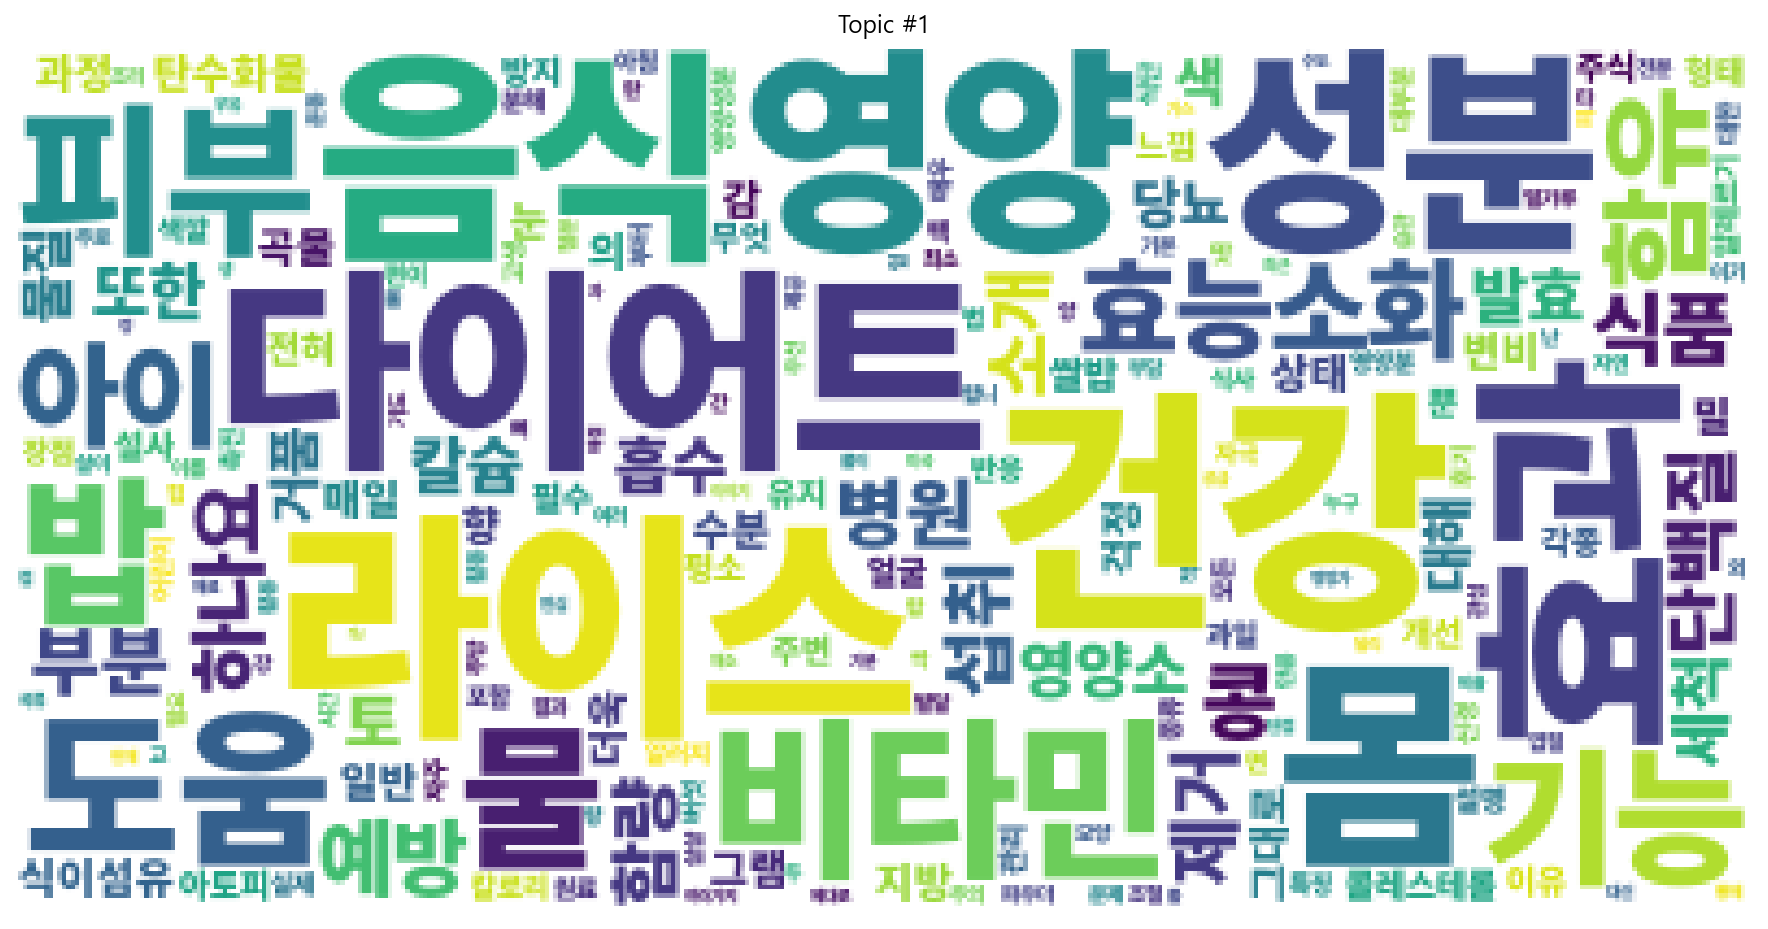

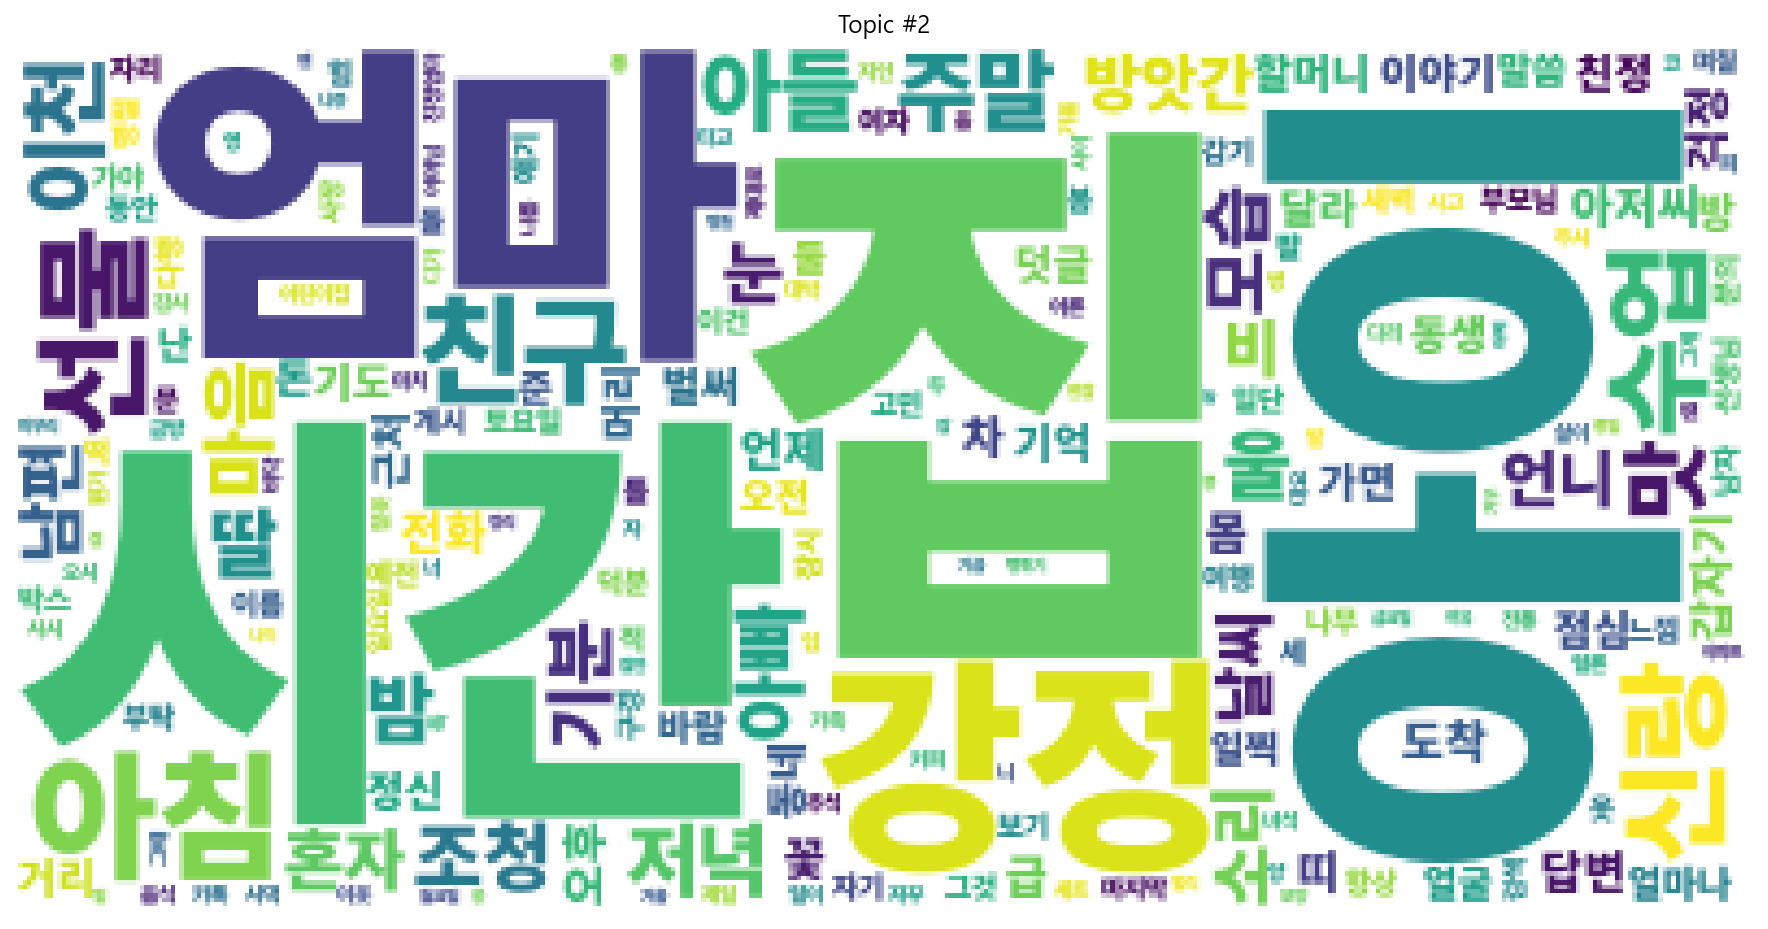

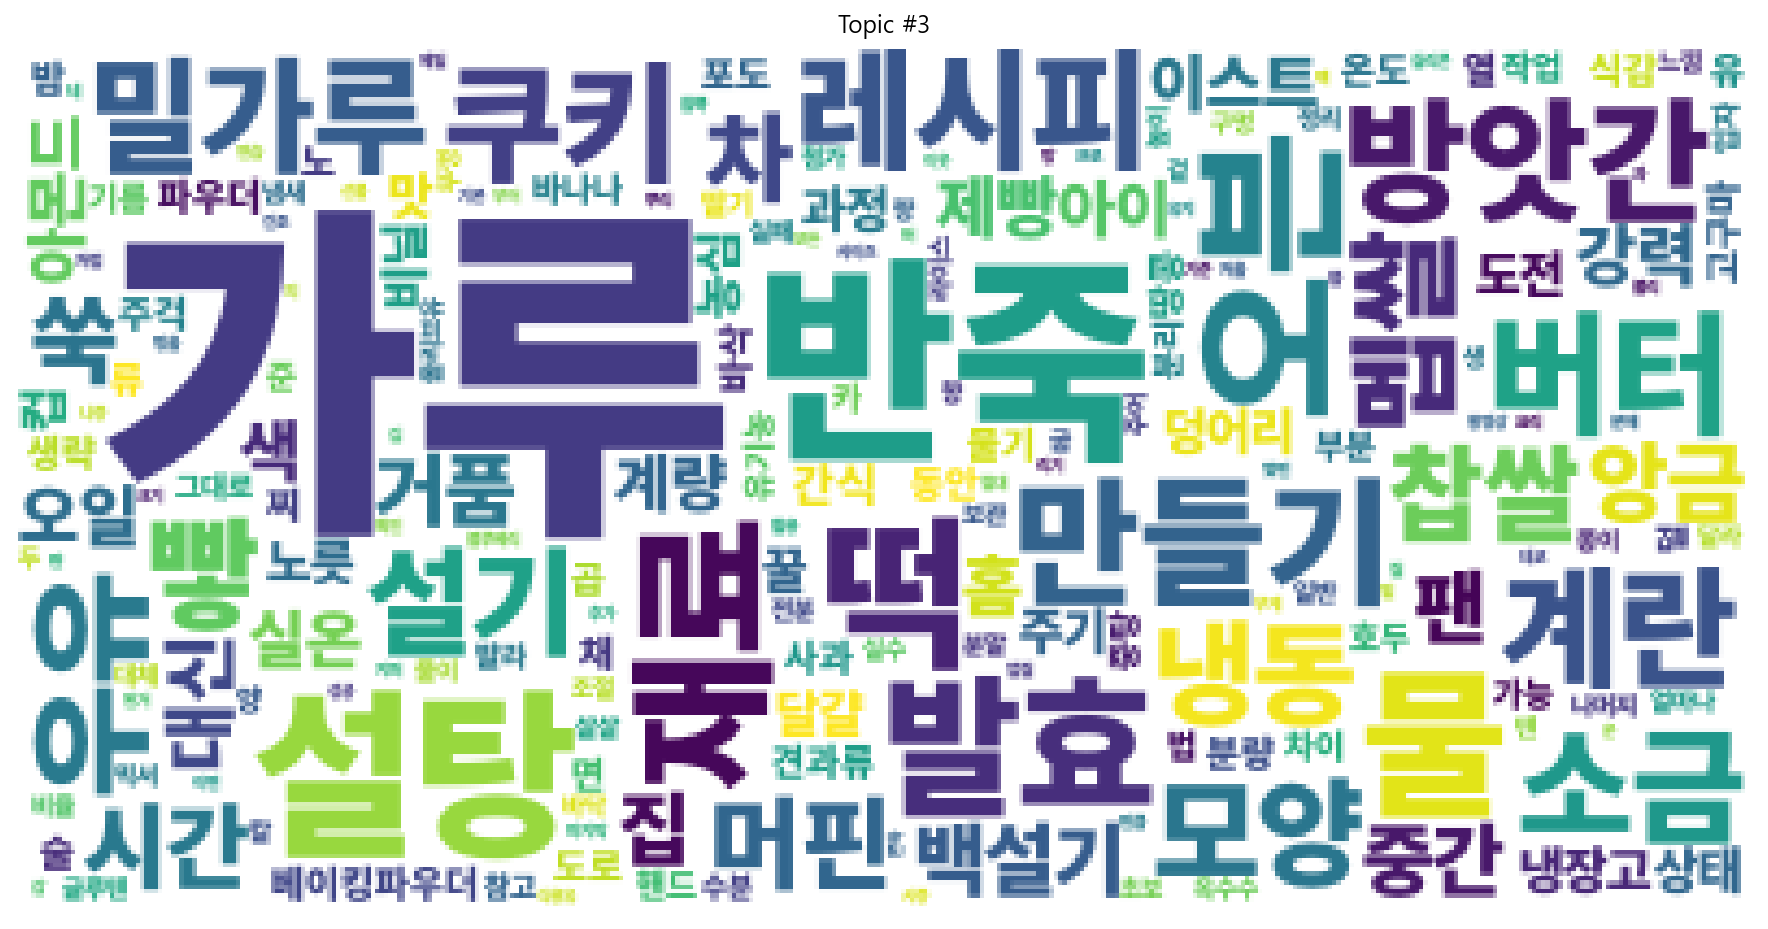

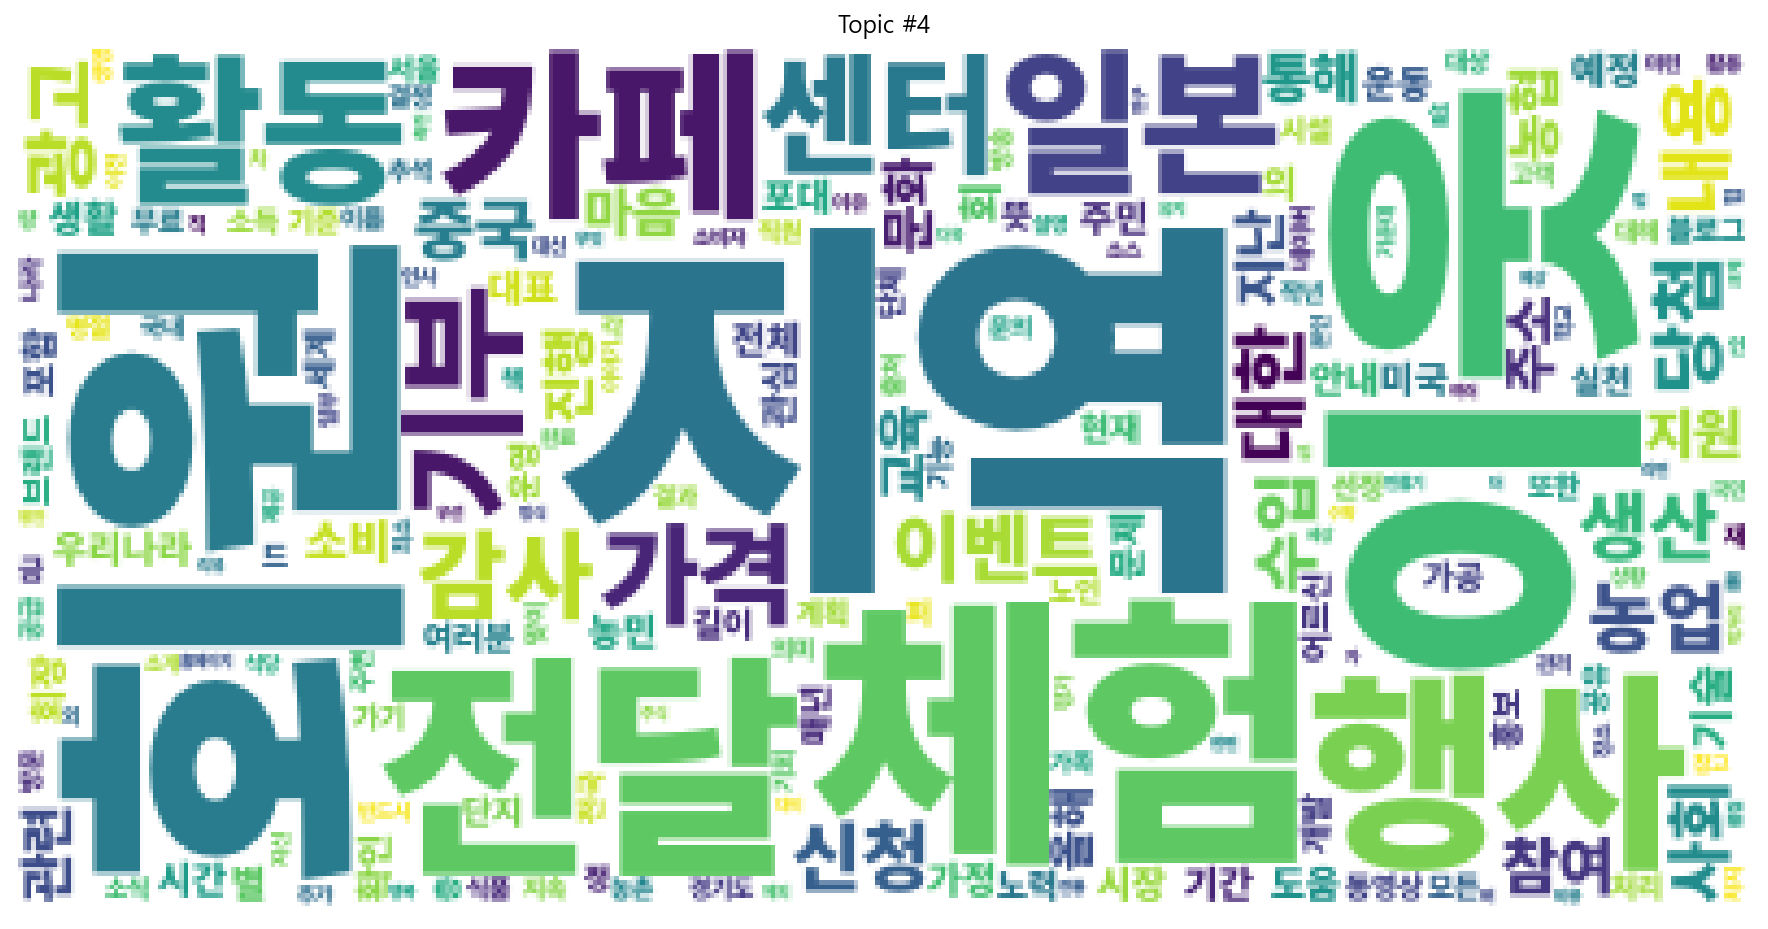

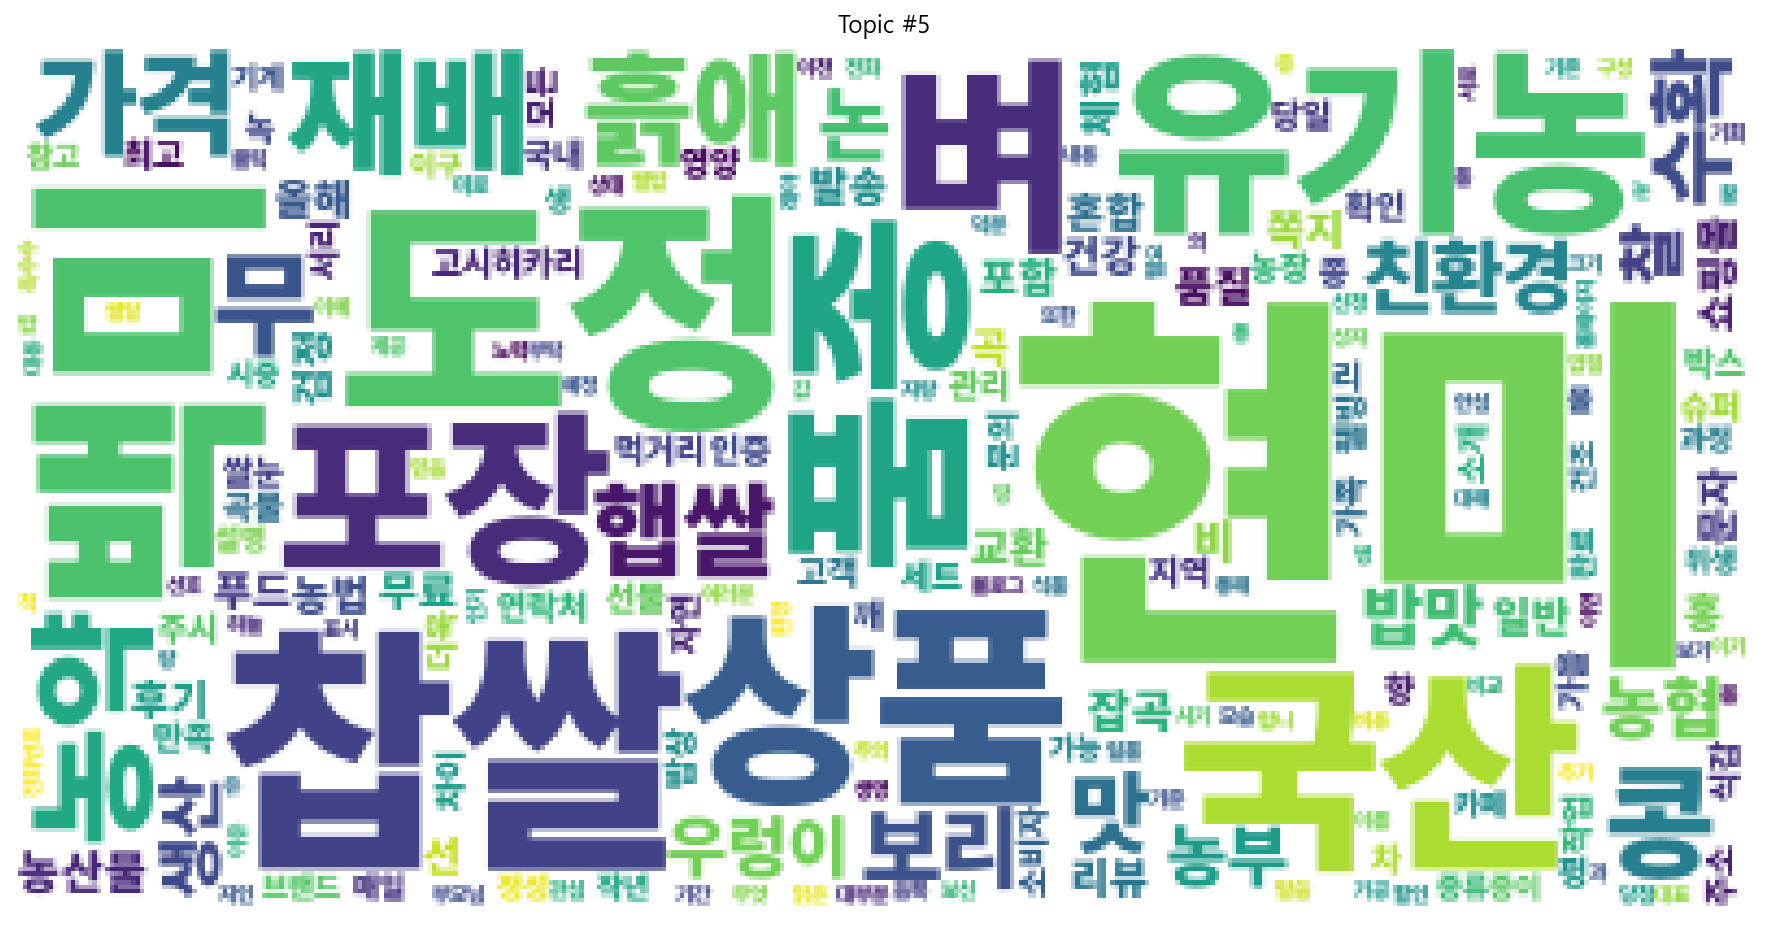

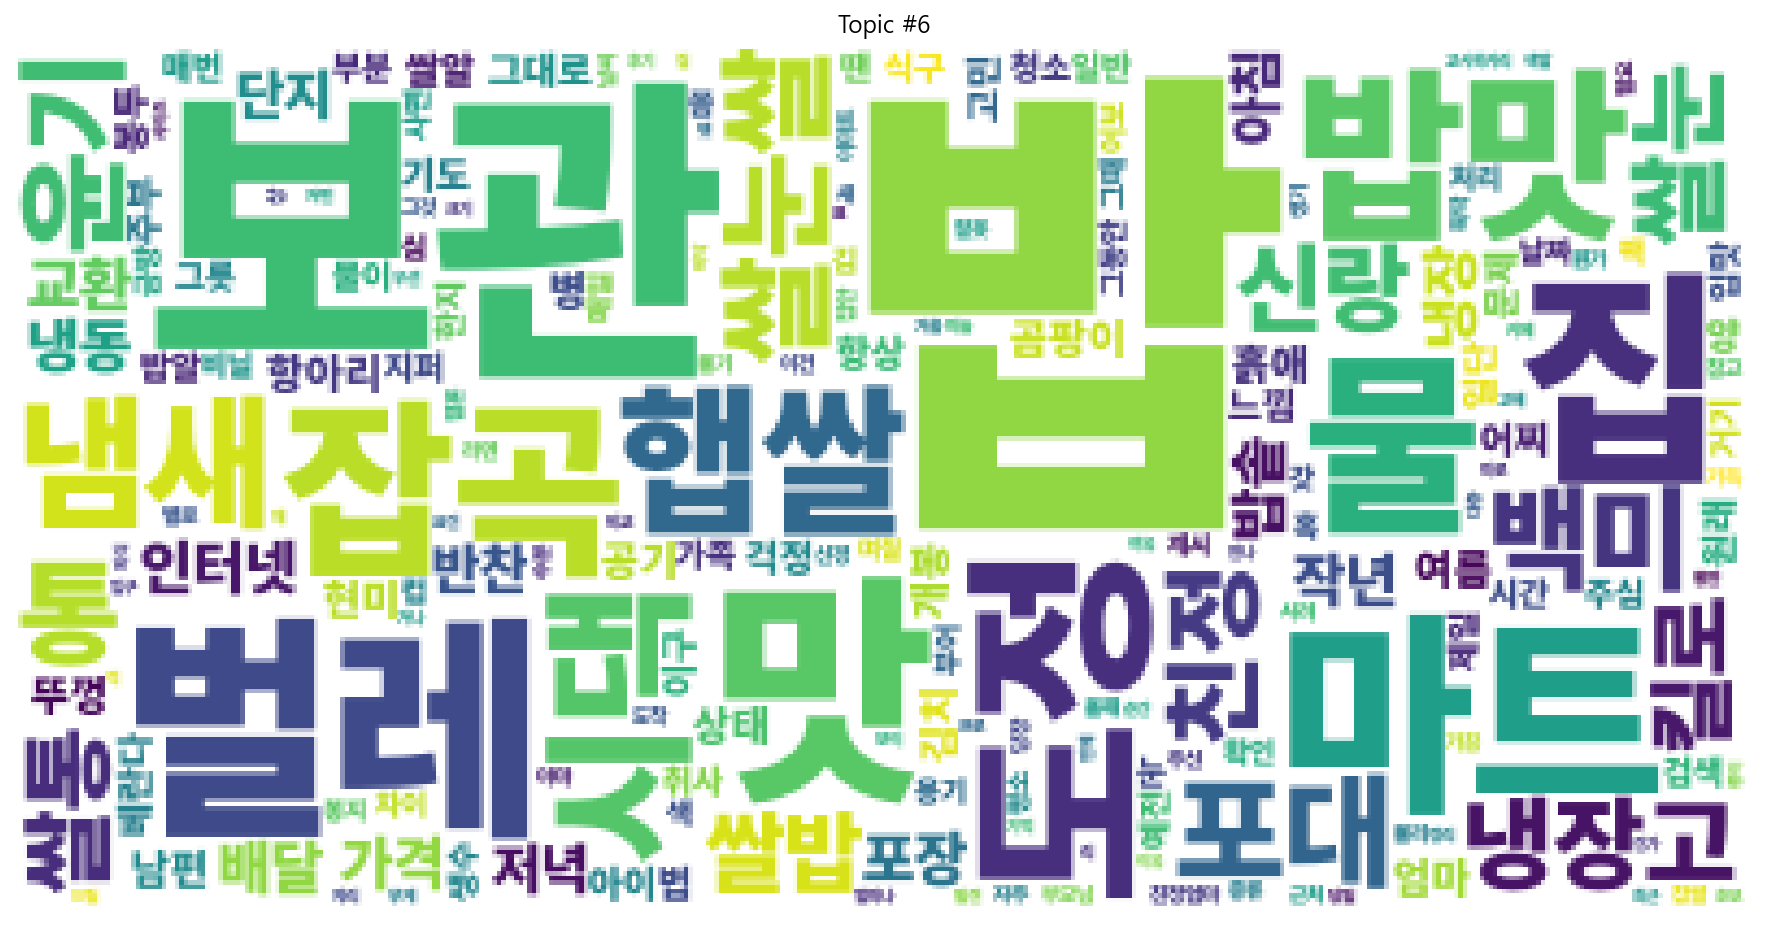

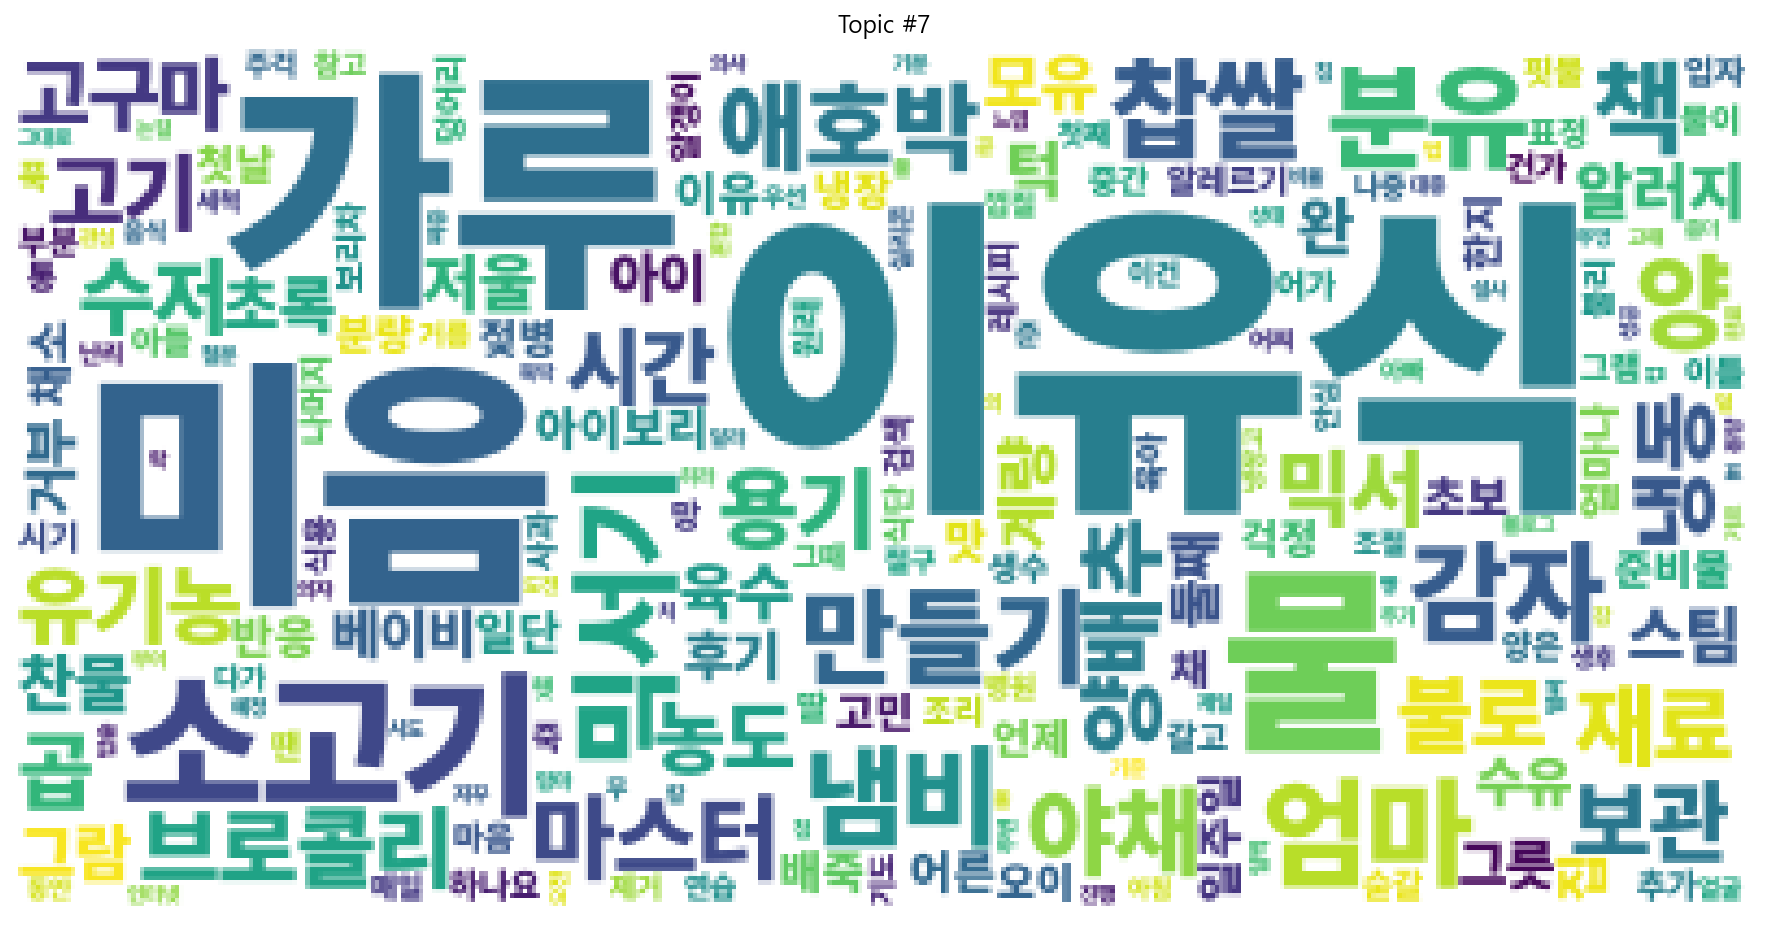

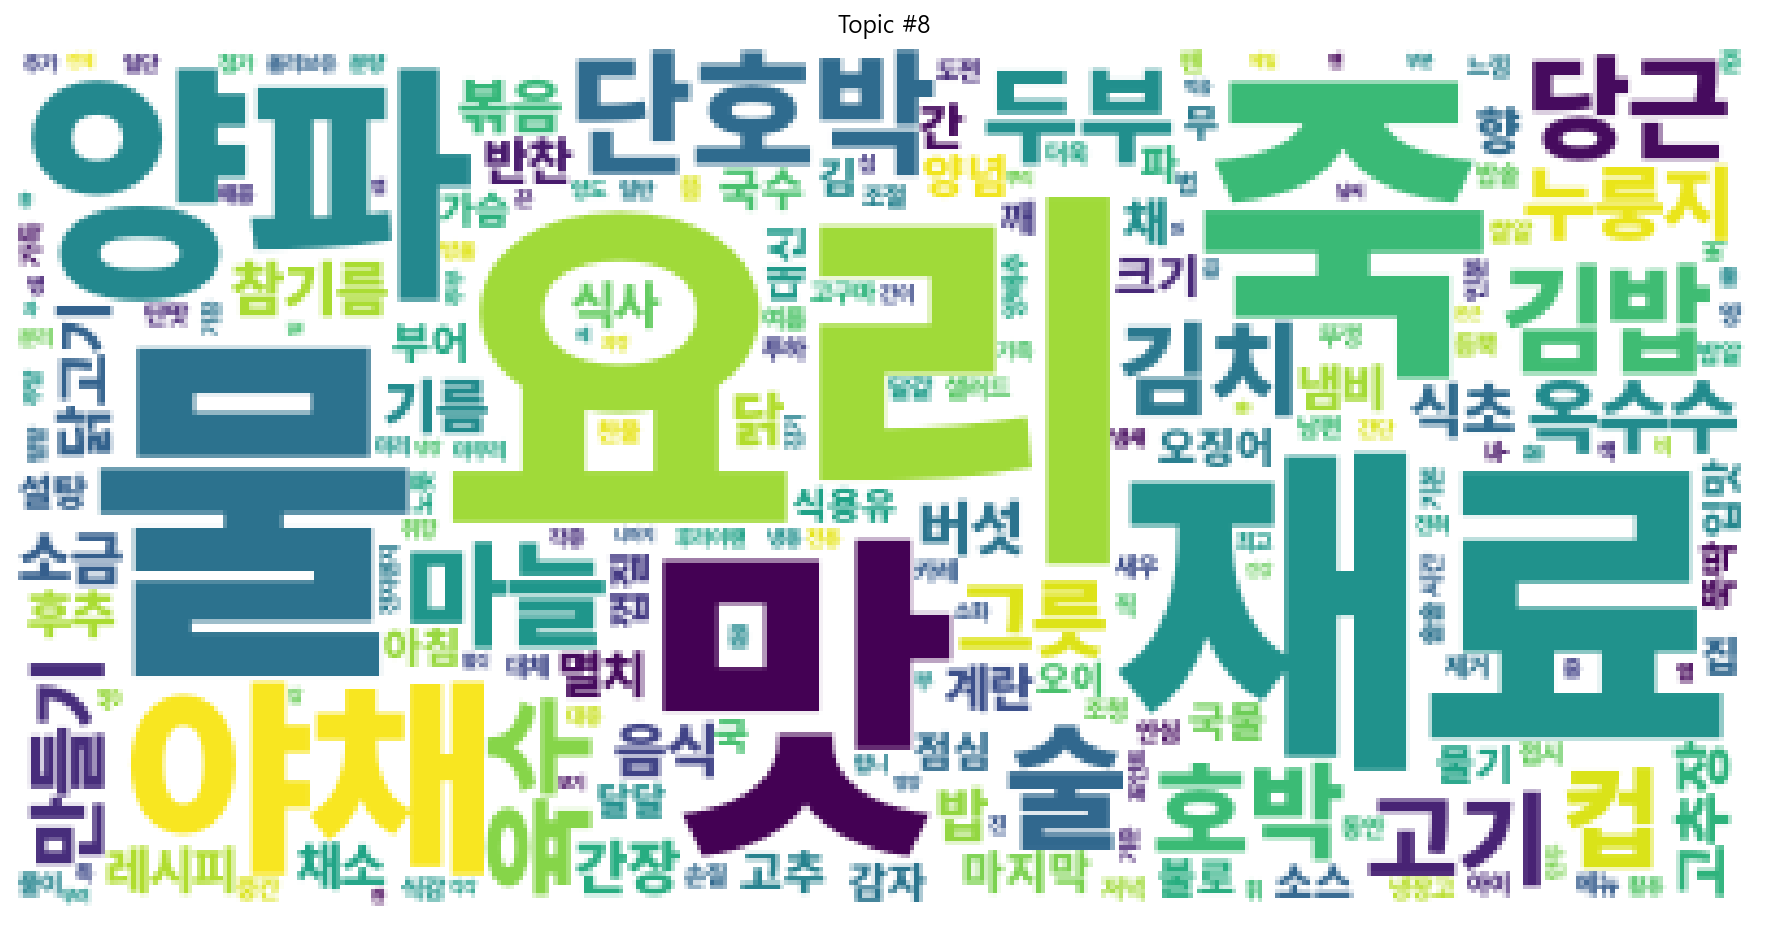

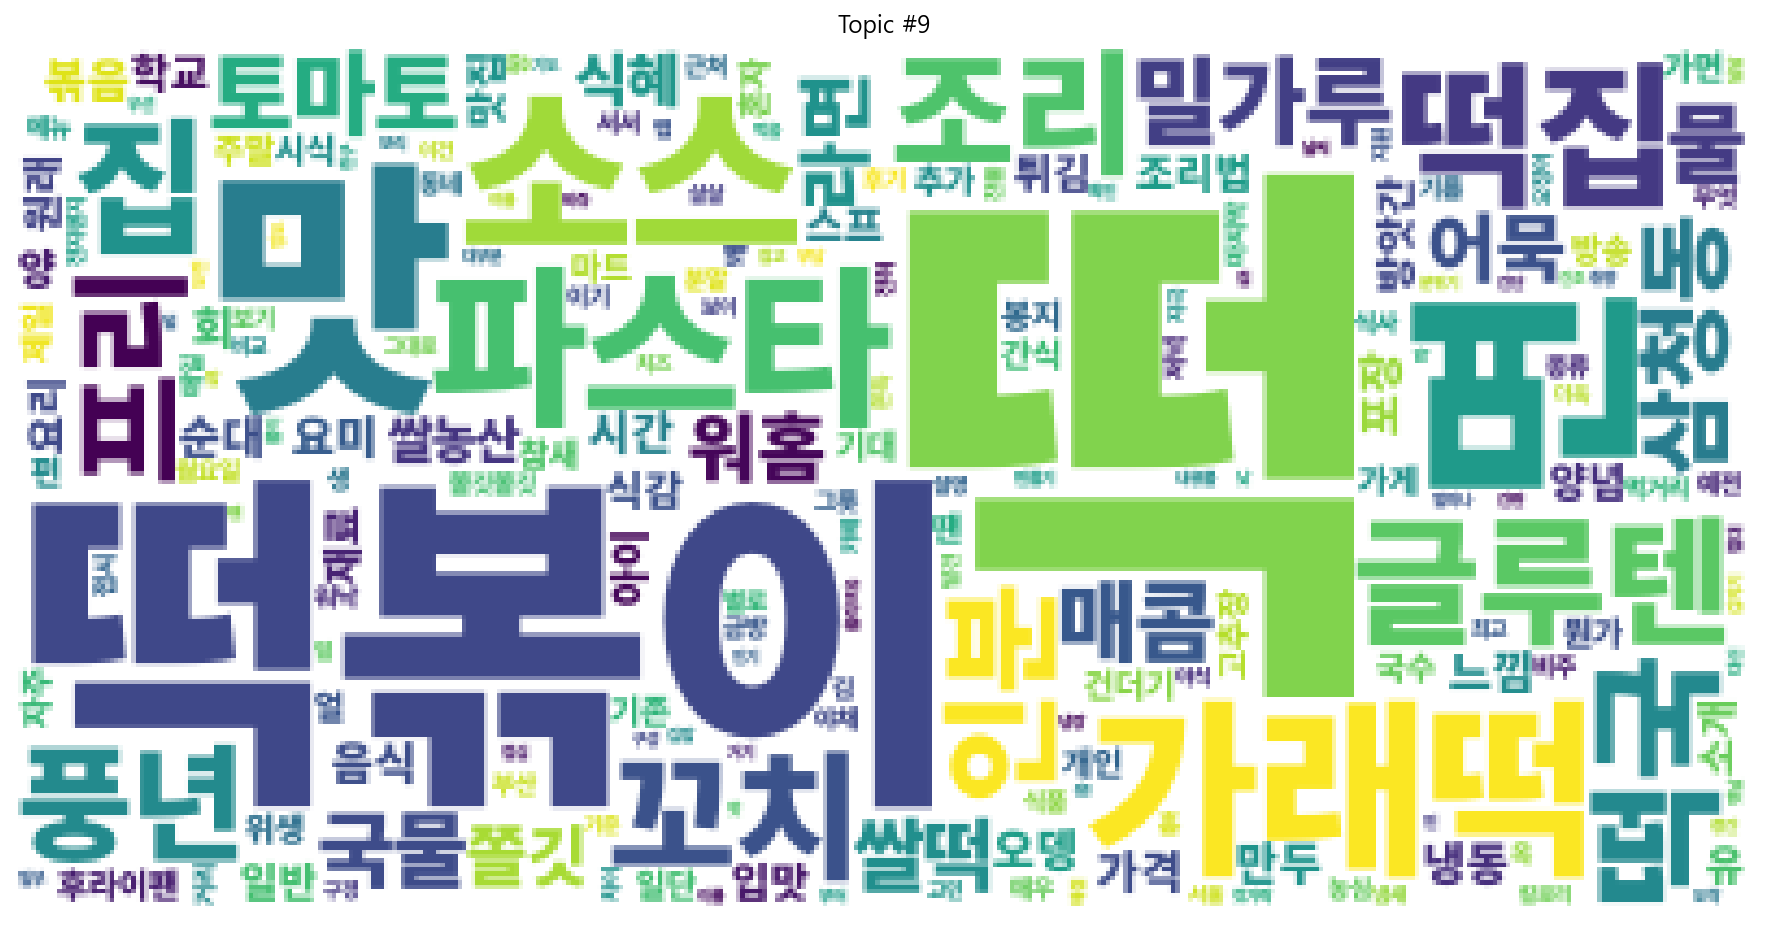

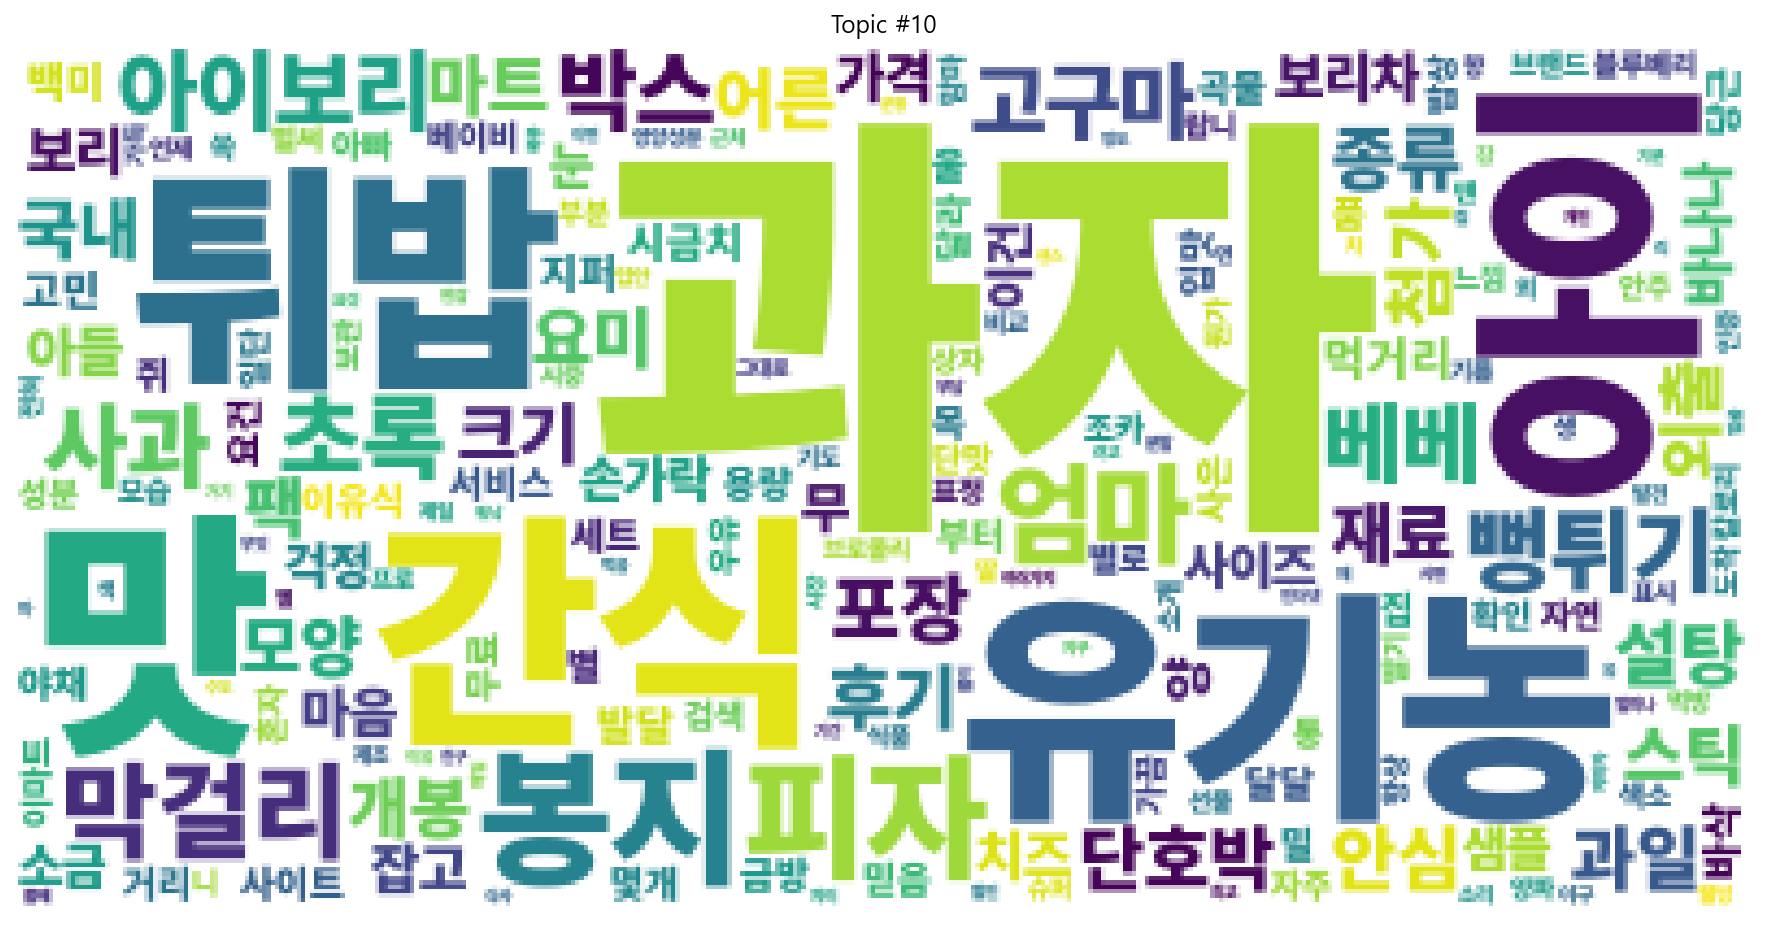

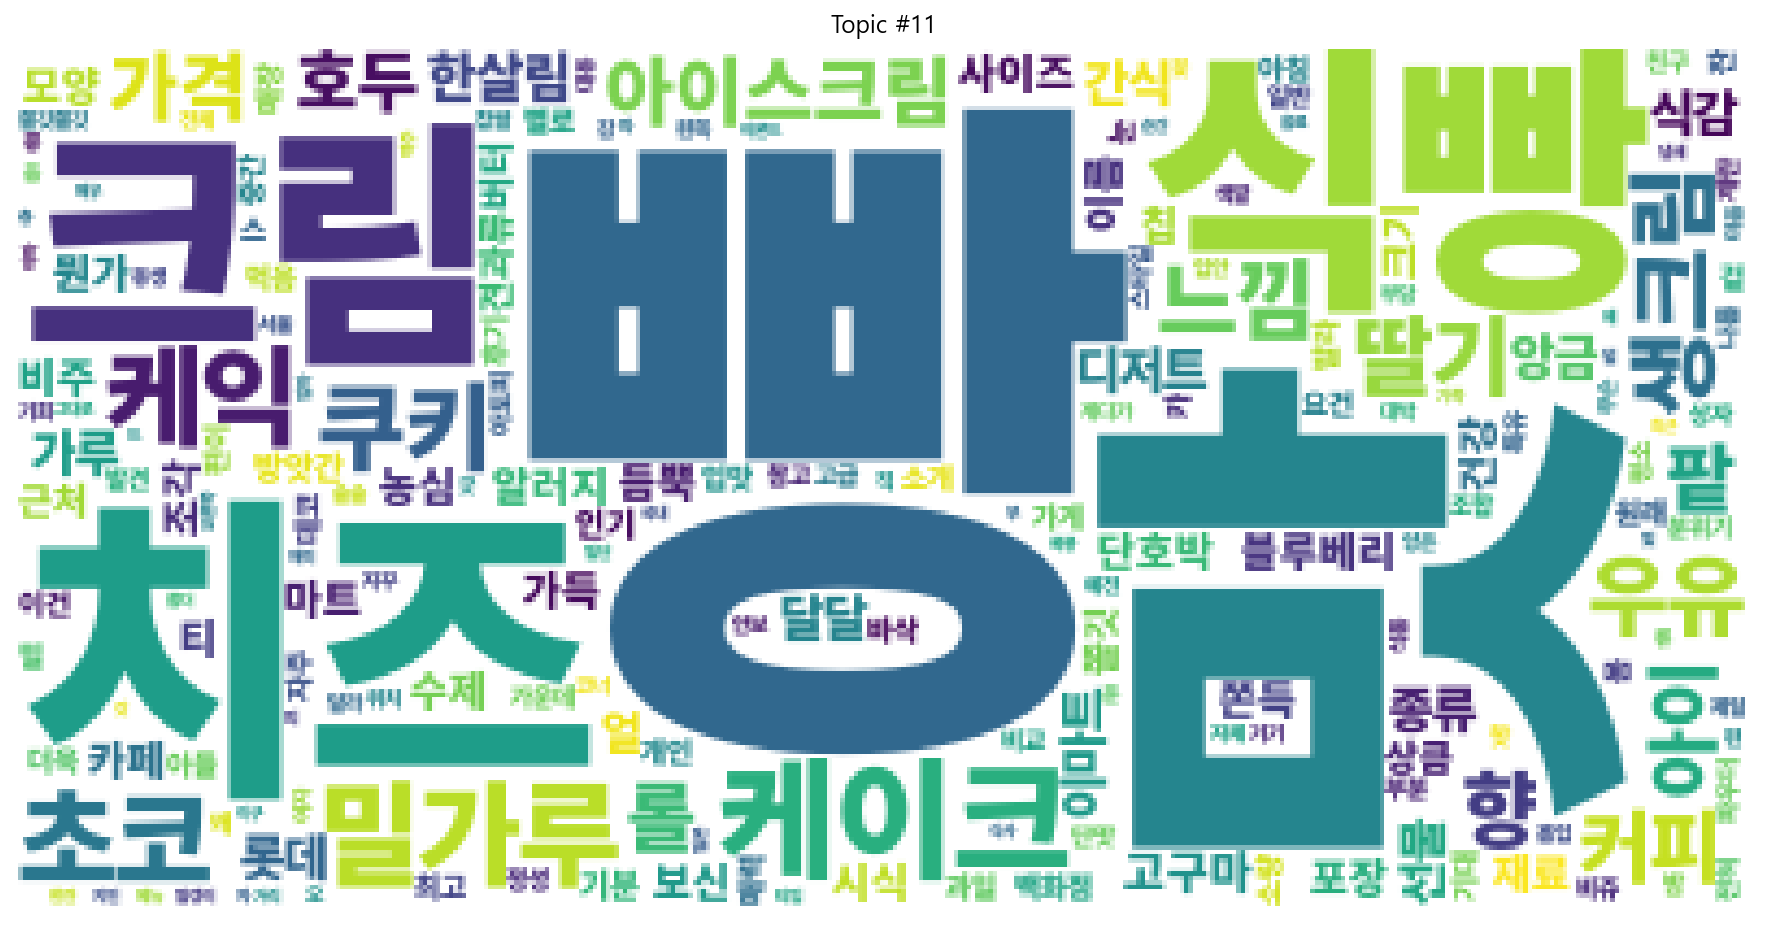

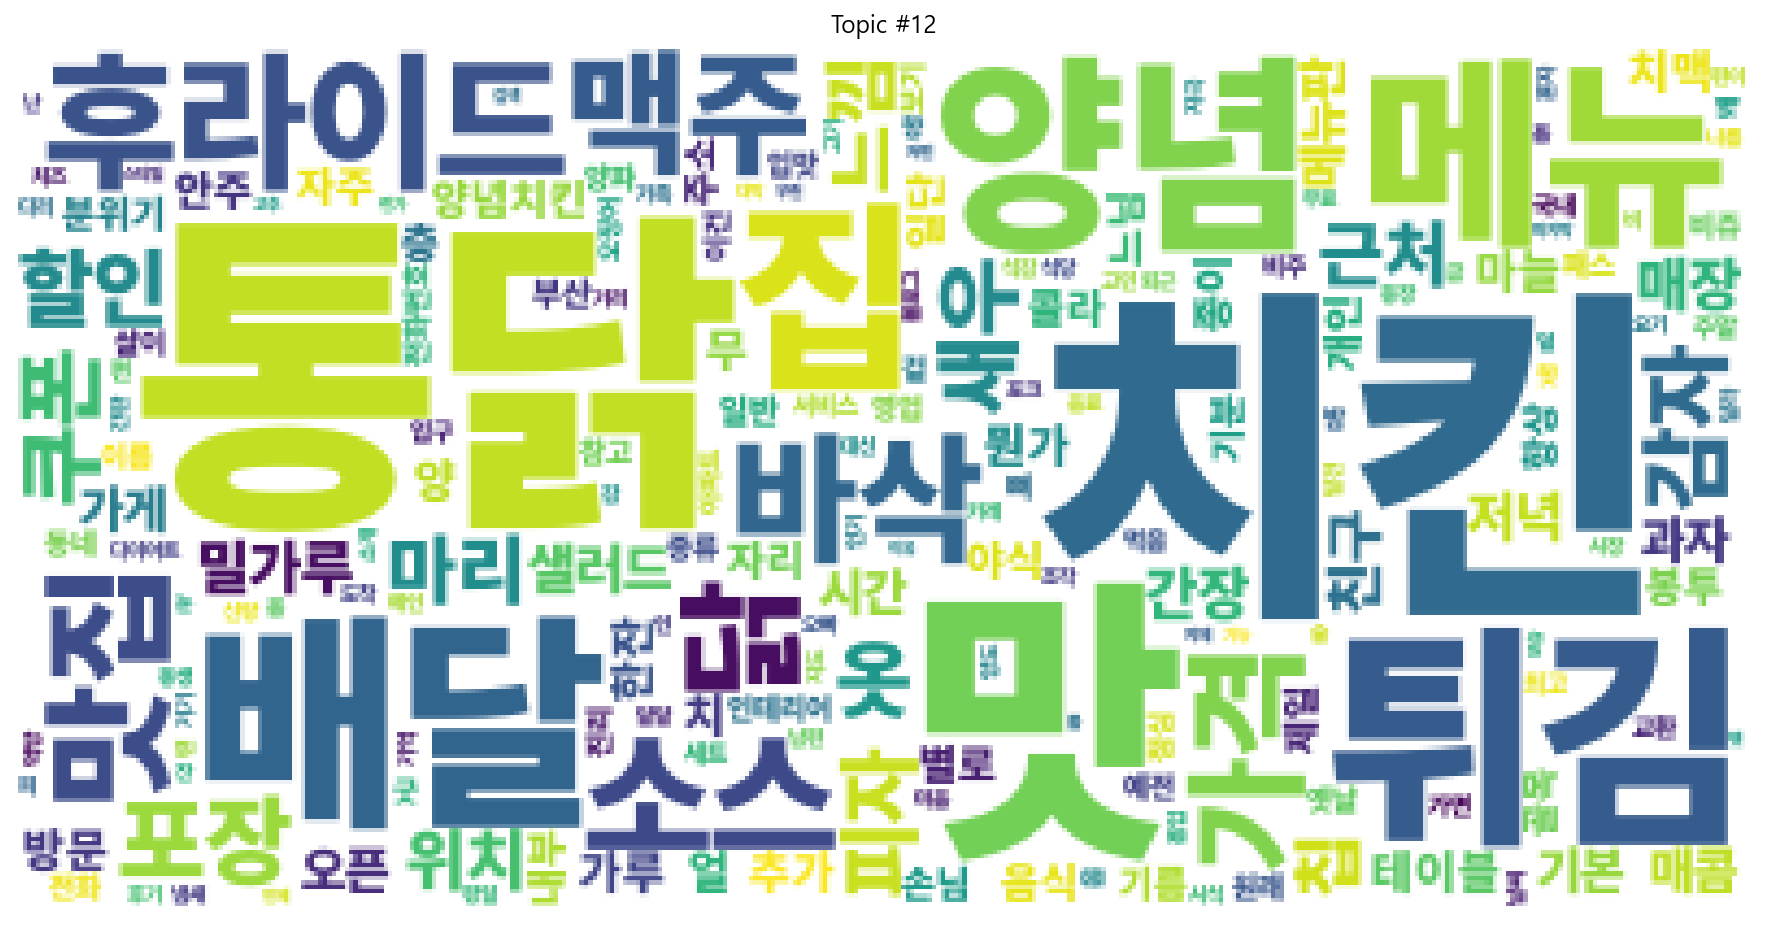

In [62]:
wc = WordCloud(background_color='white',font_path="Pretendard-Black.otf")            # 워드클라우드

plt.figure(figsize=(30,30))
for t in range(lda_model.num_topics):
    # plt.subplot(5,4,t+1)
    x = dict(lda_model.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.figure(figsize=(16,8))
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t+1))

    plt.savefig('LDA_wordcloud2015'+str(t+1)+'.png')

In [63]:
doc_per_topic_list = []

for n in range(len(corpus)):
    doc_topic = lda_model[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])



doc_topic_df = doc_topic_df.join(result_df["text"])  

doc_topic_df

doc_topic_df.groupby('Topic')[['Doc_Num']].count()

,Doc_Num
Topic,
0,809
1,2393
2,1110
3,1019
4,1064
5,2420
6,2824
7,533
8,960


In [64]:
doc_topic_df

,Doc_Num,Topic,Percentage,text
0,0,8,0.606638,한인마트는 귀찮아서 안가므로 떡볶이를 먹고싶을 때를 대비하여\n이전에 마트에서 쌀가...
1,1,7,0.469217,2015. 1. 1(을미년 새해가...)\n갑자기 만들어 보고싶은게 생각 났어요!\...
2,2,11,0.905368,2014년 마지막 치킨 치킨은 쌀통닭 너로 정했따!!!!!!!\n\n \n\n\n\...
3,3,5,0.457864,이번 포스팅에서는 쌀벌레 없애는 방법에 대해서 알아보겠습니다\n\n\n쌀 속에 벌레...
4,4,7,0.362586,"조청은 따끈하게 차로 마셔도 좋고,\n물엿 대신 요리에 넣어도 좋고,\n가래떡이나 ..."
...,...,...,...,...
16612,16612,7,0.704449,요리전용맛술 마트가면 보기는 했는데 저게 꼭 필요할까 하는 생각에 구매를 망설였는데...
16613,16613,6,0.361122,가능한가요;;;;;믹서기 청소가 귀찮아서 ;;;
16614,16614,6,0.694442,담주부터 초기이유식 시작인데 아직 애가 못앉잖아요. 다들 그냥 분유주듯 안아서 먹이...
16615,16615,9,0.770813,어뭉들어디서 사드시나요? 아이간식사먹이는 사이트추천좀해주셔요^ ^


In [65]:
doc_topic_df.to_excel("2015topic_12.xlsx")